![Clustering Algorithm Infographics](https://miro.medium.com/max/1400/1*xCKGM7tUzoR53oFv4yTPWA.png)  

Notebook adapted from DESTIN GONG

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For more advanced plotting
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  # For data preprocessing
from sklearn.cluster import KMeans, DBSCAN  # For clustering algorithms
from sklearn import metrics  # For evaluation metrics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
# Load the dataset using pandas
df = pd.read_csv("Mall_Customers.csv")

In [5]:

# Display basic information about the dataset
print(df.head())  # Show first few rows of data
print(df.describe())  # Statistical summary of numerical columns
print(df.info())  # Information about columns and data types
print(df.isnull().sum())  # Check for missing values
print(df.shape)  # Number of rows and columns in the dataset

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

In [6]:
# Identify numerical and categorical variables
num_list = []  # List to store numerical columns
cat_list = []  # List to store categorical columns

for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_list.append(column)
    elif pd.api.types.is_string_dtype(df[column]):
        cat_list.append(column)

print("Numeric columns:", num_list)  # Print numerical columns
print("Categorical columns:", cat_list)  # Print categorical columns

Numeric columns: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Categorical columns: ['Gender']


In [7]:
# Encode categorical variable 'Gender' using LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df["Gender"])
df = df.drop("CustomerID", axis=1)  # Drop 'CustomerID' column

In [8]:
# Function to scale numerical variables and plot histograms
def data_scaler(scaler, var):
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1, 1))
    df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))

    plt.figure(figsize=(5, 5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind='hist')

    plt.figure(figsize=(5, 5))
    plt.title(var)
    df[var].plot(kind='hist')

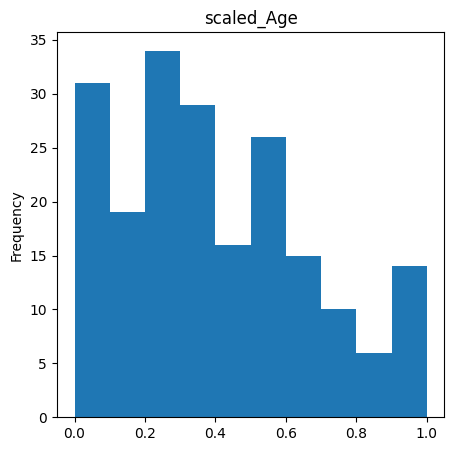

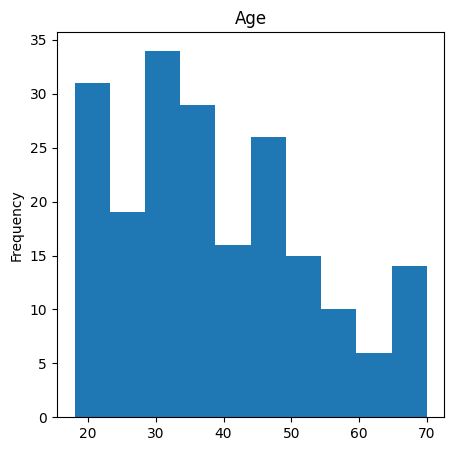

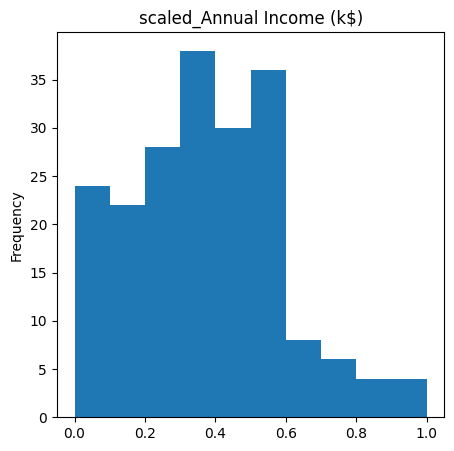

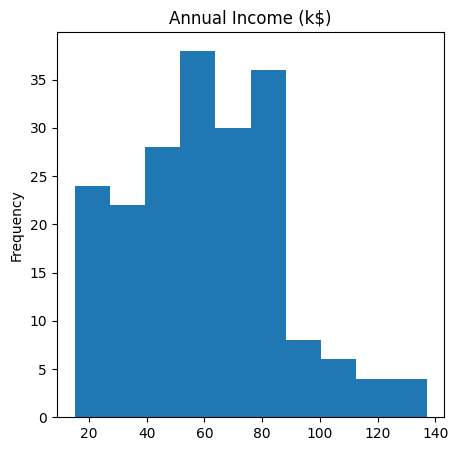

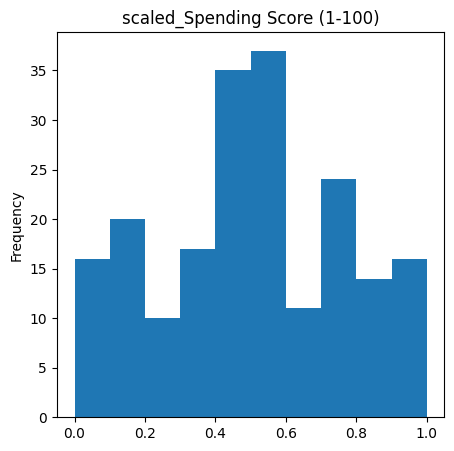

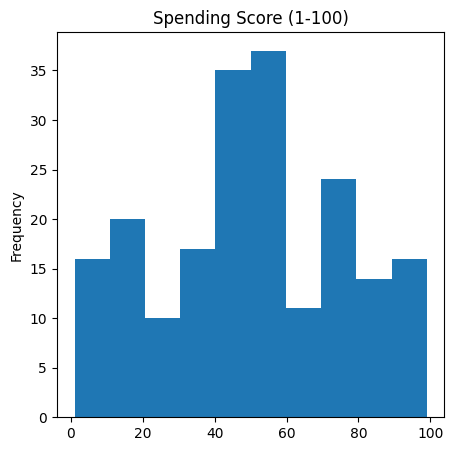

In [9]:
# Scale numerical variables using MinMaxScaler
scaler = MinMaxScaler()

for var in ["Age", "Annual Income (k$)", 'Spending Score (1-100)']:
    data_scaler(scaler, var)  # Apply scaling function to each variable

Text(0.5, 0, 'Spending Score (1-100)')

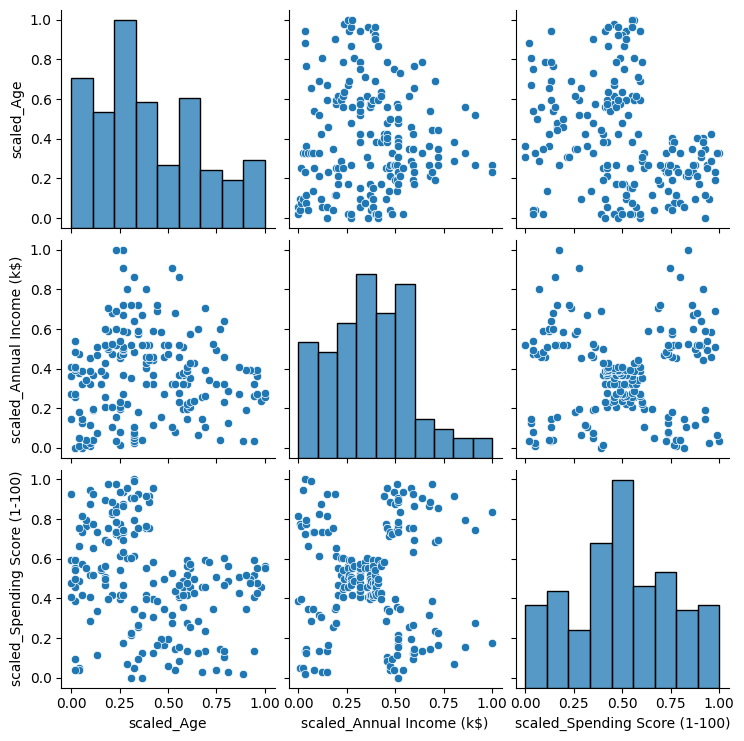

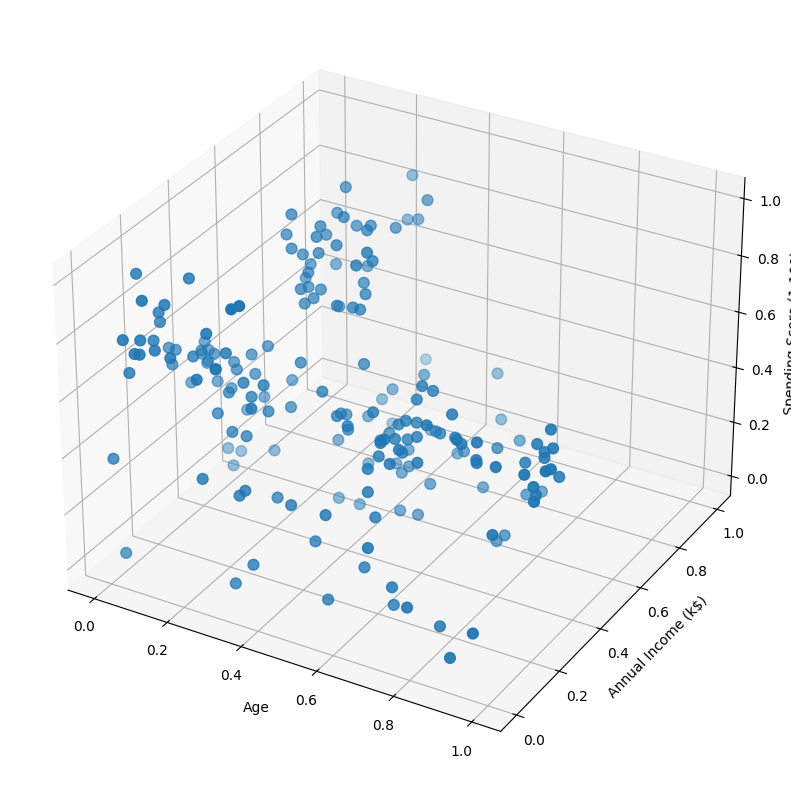

In [10]:
# Perform Exploratory Data Analysis (EDA) with pairplots and 3D scatter plots
columns = ["scaled_Age", "scaled_Annual Income (k$)", "scaled_Spending Score (1-100)"]

# Pairplot for 2D relationships
sns.pairplot(df[columns])

# 3D scatter plot for multiple dimensions
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter(df["scaled_Age"], df["scaled_Annual Income (k$)"], df["scaled_Spending Score (1-100)"], s=60)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")


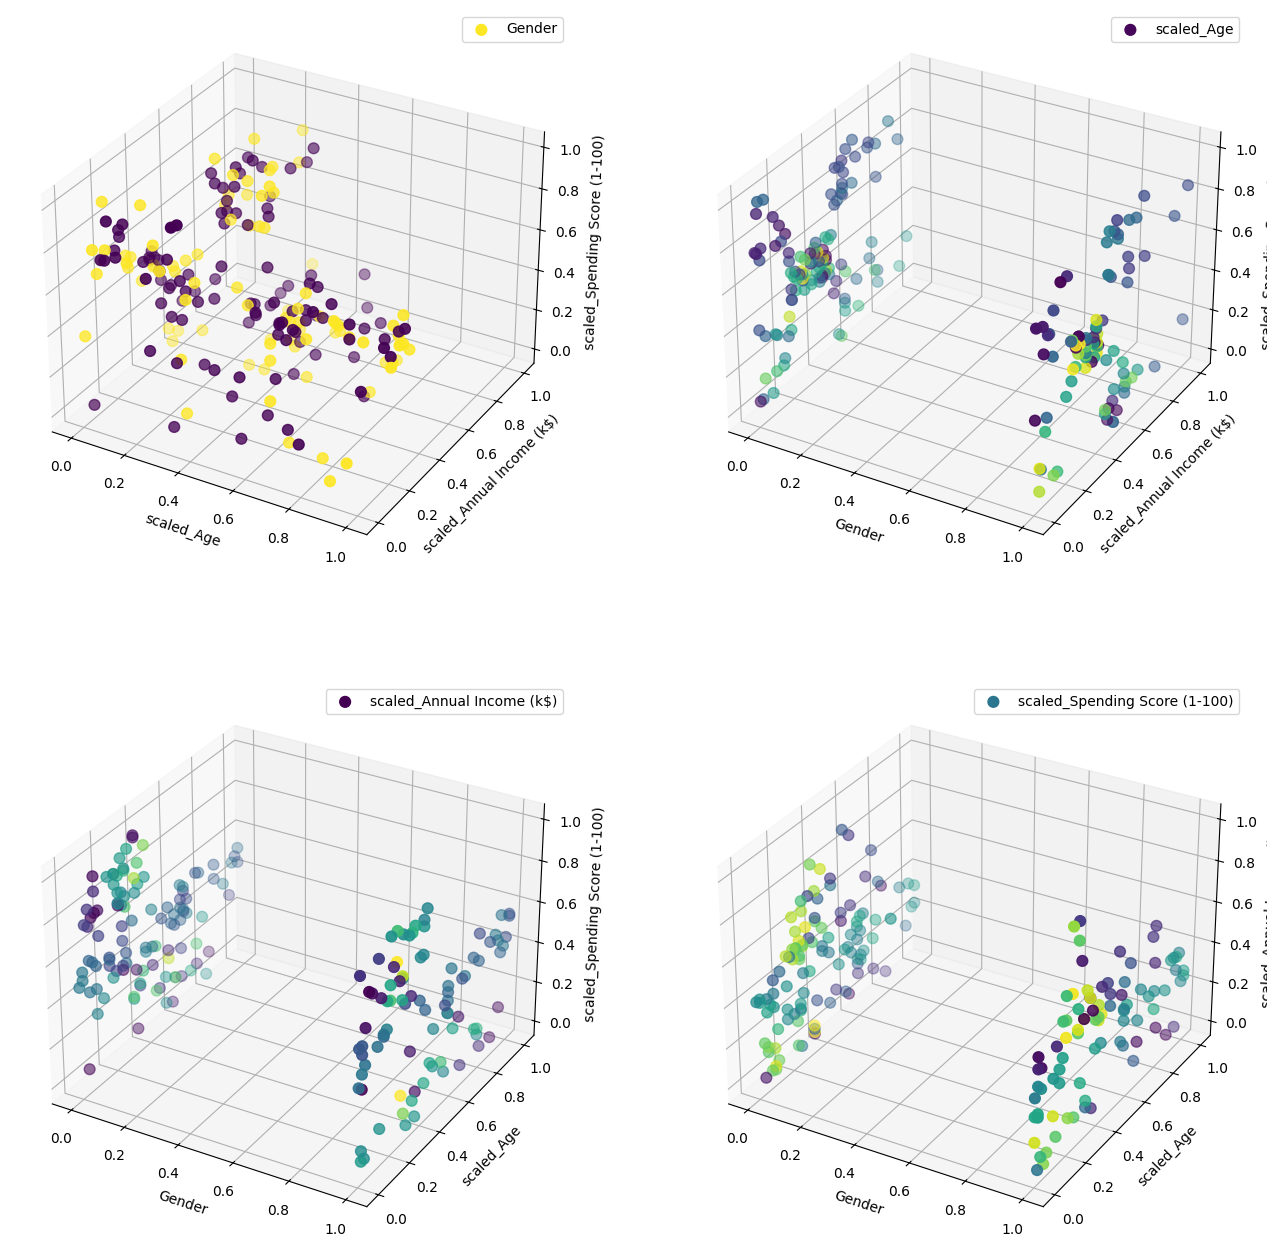

In [11]:
# Plot 3D scatter plots with color coding based on categorical or numerical variables
fig = plt.figure(figsize=(16, 16))
variables_list = ["Gender", "scaled_Age", "scaled_Annual Income (k$)", 'scaled_Spending Score (1-100)']

for i in range(len(variables_list)):
    axis_list = ["Gender", "scaled_Age", "scaled_Annual Income (k$)", 'scaled_Spending Score (1-100)']
    legend = variables_list[i]
    axis_list.pop(i)
    x, y, z = axis_list

    ax = fig.add_subplot(221 + i, projection='3d')
    sc = ax.scatter(df[x], df[y], df[z], s=60, c=df[legend], label=variables_list[i])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.legend()


In [12]:
# Function to perform KMeans clustering and evaluate with inertia and silhouette scores
def KMeans_Algorithm(dataset, n):
    clustering_KMeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, random_state=0, algorithm="elkan")
    clustering_KMeans.fit(dataset)

    centroids = clustering_KMeans.cluster_centers_
    label = clustering_KMeans.labels_
    df["label"] = label

    inertia = clustering_KMeans.inertia_
    silhouette_score = metrics.silhouette_score(dataset, label)

    return inertia, label, centroids, silhouette_score


In [13]:
# Perform KMeans clustering on different combinations of variables
# Example: Spending Score vs. Age, vs. Annual Income
X1 = df[["scaled_Age", "scaled_Spending Score (1-100)"]].values
X2 = df[["scaled_Annual Income (k$)", "scaled_Spending Score (1-100)"]].values
X3 = df[["scaled_Age", "scaled_Annual Income (k$)", "scaled_Spending Score (1-100)"]].values

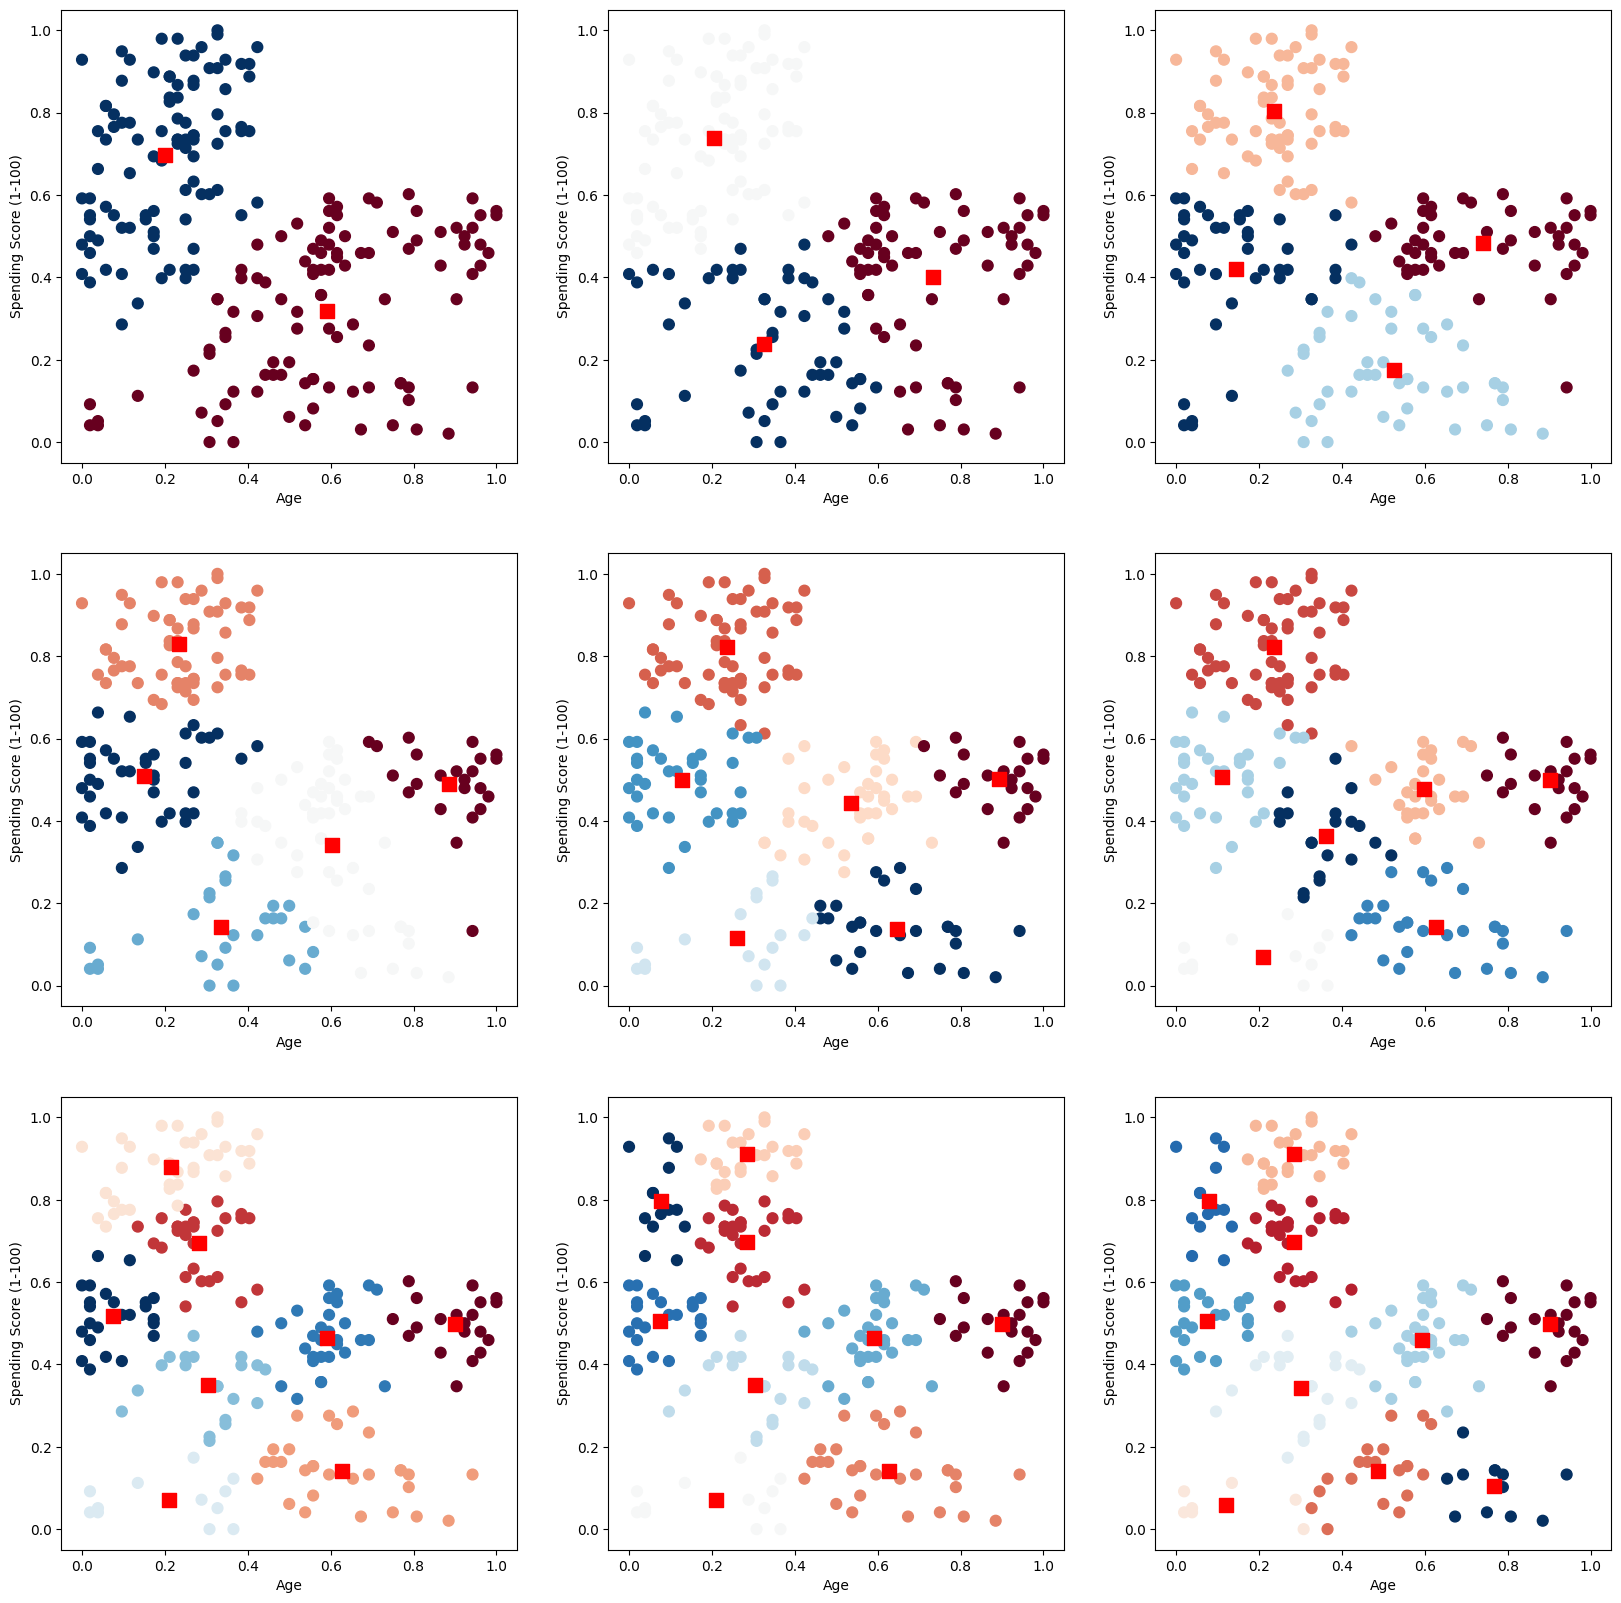

In [14]:
# Evaluate clustering with different numbers of clusters
fig1 = plt.figure(figsize=(20, 20))
X1_inertia_values = []  # Initialize list to store inertia values
X1_silhouette_scores = [] # Initialize list to store silhouette scores
for i in range(2, 11):
    X1_inertia, X1_label, X1_centroids, X1_silhouette = KMeans_Algorithm(X1, i)
    X1_inertia_values.append(X1_inertia) # Store inertia value for current number of clusters
    X1_silhouette_scores.append(X1_silhouette) # Store silhouette score for current number of clusters
    centroids_df = pd.DataFrame(X1_centroids, columns=['X', 'Y'])

    sub = fig1.add_subplot(330 + i - 1)
    sub.scatter(df["scaled_Age"], df["scaled_Spending Score (1-100)"], s=60, c=df["label"], cmap="RdBu")
    sub.scatter(centroids_df['X'], centroids_df['Y'], s=90, marker=",", color="r")
    sub.set_xlabel("Age")
    sub.set_ylabel("Spending Score (1-100)")


Text(0, 0.5, 'Silhouette Score')

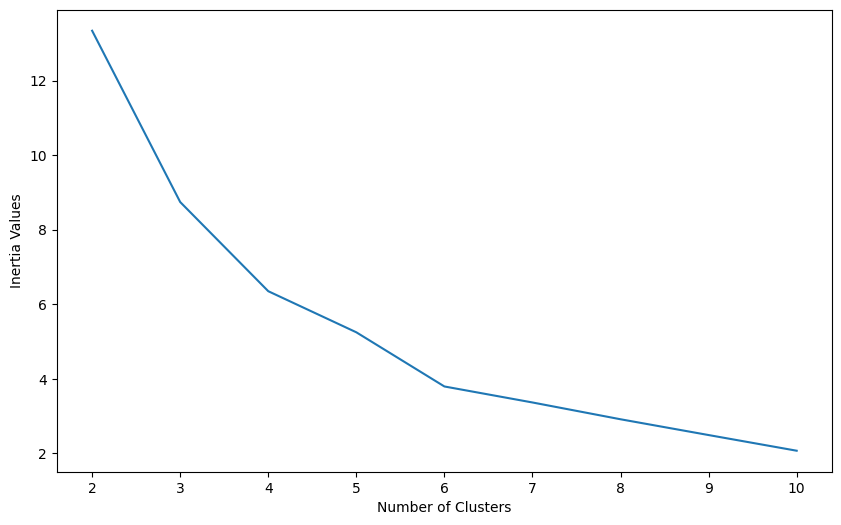

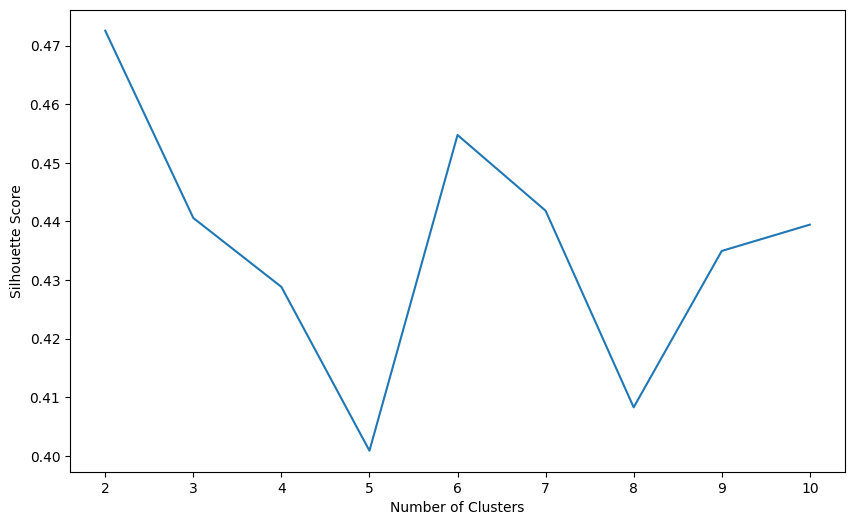

In [15]:
# Plot inertia and silhouette scores against number of clusters
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 11), X1_inertia_values)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")

plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 11), X1_silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [ ]:
# Similar analysis for other combinations (X2 and X3)


# We have done the data modeling, now what?

This all is useless if it cannot be applied to real life situations. So what do we do with the clustering information obtained from this exercise?



1.   Customer Segmentation
2.   Marketing Strategy
1.   Product Development
2.   Resource Allocation
1.   Customer Retention
2.   Operational Efficiency





